# **FIDE Analysis**

The chess federation FIDE has released data on registered players. Let’s see if we can uncover anything interesting from it…

In [60]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from lxml import etree

In [61]:
def fix_unclosed_tags(file_path, output_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Regular expression to match tags that start without a closing '>'
    tag_re = re.compile(r'<([a-zA-Z0-9-_]+)[^>]*$')

    # List to store cleaned lines
    cleaned_lines = []

    # Loop through each line and check for unclosed tags
    for line in lines:
        # If the line has an unclosed tag, attempt to fix it
        if tag_re.search(line):
            # Add a closing '>' to the line
            line = line.strip() + ">\n"
        cleaned_lines.append(line)

    # Write the cleaned lines to a new output file
    with open(output_path, 'w') as output_file:
        output_file.writelines(cleaned_lines)

    print(f"Fixed XML written to {output_path}")

# Specify your file paths
input_file = "/content/players_list_xml_foa.xml"
output_file = "/content/cleaned_players_list_xml_foa.xml"

# Fix unclosed tags in the XML file
fix_unclosed_tags(input_file, output_file)

Fixed XML written to /content/cleaned_players_list_xml_foa.xml


In [62]:
# Path to your XML file
xml_path = "/content/players_list_xml_foa.xml"

# Container for parsed data
players_data = []

# Use lxml's iterparse to stream through the file and recover from errors
try:
    context = etree.iterparse(xml_path, tag='player', recover=True, huge_tree=True)

    for _, elem in context:
        player_dict = {}

        # Loop through each child element inside <player>
        for child in elem:
            player_dict[child.tag] = child.text

        players_data.append(player_dict)

        # Free memory while streaming
        elem.clear()
        while elem.getprevious() is not None:
            del elem.getparent()[0]

    print(f"✅ Successfully parsed {len(players_data)} player records.")

    # Convert to DataFrame
    df = pd.DataFrame(players_data)

    # Show column names and head of data
    print(f"\n📋 Columns found: {df.columns.tolist()}")

except etree.XMLSyntaxError as e:
    print("❌ XML parsing failed:", e)

✅ Successfully parsed 1042805 player records.

📋 Columns found: ['fideid', 'name', 'country', 'sex', 'title', 'w_title', 'o_title', 'foa_title', 'rating', 'games', 'k', 'rapid_rating', 'rapid_games', 'rapid_k', 'blitz_rating', 'blitz_games', 'blitz_k', 'birthday', 'flag']


In [63]:
# Display the first 5 rows
print(df.head())

      fideid                     name country sex title w_title o_title  \
0  167105475                     -, -     FID   M  None    None    None   
1   10292519  A A M Imtiaz, Chowdhury     BAN   M  None    None    None   
2   10688862     A Abdel Maabod, Hoda     EGY   F  None    None    None   
3   33496722                   A Aman     IND   M  None    None    None   
4  537001345     A Arbhin Vanniarajan     IND   M  None    None    None   

  foa_title rating games  k rapid_rating rapid_games rapid_k blitz_rating  \
0      None      0     0  0            0           0       0            0   
1      None      0     0  0            0           0       0            0   
2      None      0     0  0            0           0       0            0   
3      None      0     0  0            0           0       0            0   
4      None      0     0  0            0           0       0            0   

  blitz_games blitz_k birthday  flag  
0           0       0     1999  None  
1       

In [64]:
# Path to your XML file
xml_path_cleaned = "/content/cleaned_players_list_xml_foa.xml"

# Container for parsed data
players_data_cleaned = []

# Use lxml's iterparse to stream through the file and recover from errors
try:
    context = etree.iterparse(xml_path_cleaned, tag='player', recover=True, huge_tree=True)

    for _, elem in context:
        player_dict = {}

        # Loop through each child element inside <player>
        for child in elem:
            player_dict[child.tag] = child.text

        players_data_cleaned.append(player_dict)

        # Free memory while streaming
        elem.clear()
        while elem.getprevious() is not None:
            del elem.getparent()[0]

    print(f"✅ Successfully parsed {len(players_data_cleaned)} player records.")

    # Convert to DataFrame
    df_cleaned = pd.DataFrame(players_data_cleaned)

    # Show column names and head of data
    print(f"\n📋 Columns found: {df_cleaned.columns.tolist()}")

except etree.XMLSyntaxError as e:
    print("❌ XML parsing failed:", e)

✅ Successfully parsed 1042805 player records.

📋 Columns found: ['fideid', 'name', 'country', 'sex', 'title', 'w_title', 'o_title', 'foa_title', 'rating', 'games', 'k', 'rapid_rating', 'rapid_games', 'rapid_k', 'blitz_rating', 'blitz_games', 'blitz_k', 'birthday', 'flag']


In [65]:
# Display the first 5 rows
print(df_cleaned.head())

      fideid                     name country sex title w_title o_title  \
0  167105475                     -, -     FID   M  None    None    None   
1   10292519  A A M Imtiaz, Chowdhury     BAN   M  None    None    None   
2   10688862     A Abdel Maabod, Hoda     EGY   F  None    None    None   
3   33496722                   A Aman     IND   M  None    None    None   
4  537001345     A Arbhin Vanniarajan     IND   M  None    None    None   

  foa_title rating games  k rapid_rating rapid_games rapid_k blitz_rating  \
0      None      0     0  0            0           0       0            0   
1      None      0     0  0            0           0       0            0   
2      None      0     0  0            0           0       0            0   
3      None      0     0  0            0           0       0            0   
4      None      0     0  0            0           0       0            0   

  blitz_games blitz_k birthday  flag  
0           0       0     1999  None  
1       

In [66]:
# Basic overview of numerical columns
print("📊 Descriptive statistics:")
print(df.describe(include='all').transpose())

📊 Descriptive statistics:
                count   unique          top     freq
fideid        1042805  1042805     44516797        1
name          1042804  1009029  Manoj Kumar       24
country       1042804      208          IND    89979
sex           1042804        2            M   882089
title           14518        8           FM     5828
w_title          3009        4          WFM     1317
o_title          8660      111           NA     5455
foa_title        6791        4          AFM     2602
rating        1042804     1279            0   723624
games         1042804       35            0   994359
k             1042804        5            0   723624
rapid_rating  1042804     1268            0   801308
rapid_games   1042804       52            0  1023367
rapid_k       1042804        4            0   801308
blitz_rating  1042804     1273            0   880544
blitz_games   1042804       76            0  1032587
blitz_k       1042804        4            0   880544
birthday      102065

In [67]:
print("\n🔍 Missing values per column:")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))


🔍 Missing values per column:
w_title         1039796
foa_title       1036014
o_title         1034145
title           1028287
flag             711249
birthday          22153
country               1
name                  1
sex                   1
rating                1
k                     1
games                 1
rapid_rating          1
rapid_games           1
blitz_rating          1
rapid_k               1
blitz_k               1
blitz_games           1
dtype: int64


In [68]:
print("\n📉 Percentage of missing values:")
print((df.isnull().mean() * 100).round(2).sort_values(ascending=False))


📉 Percentage of missing values:
w_title         99.71
foa_title       99.35
o_title         99.17
title           98.61
flag            68.21
birthday         2.12
fideid           0.00
country          0.00
name             0.00
sex              0.00
rating           0.00
k                0.00
games            0.00
rapid_rating     0.00
rapid_games      0.00
blitz_rating     0.00
rapid_k          0.00
blitz_k          0.00
blitz_games      0.00
dtype: float64


In [69]:
# Total duplicate rows
num_duplicates = df.duplicated().sum()
print(f"\n📁 Duplicate rows: {num_duplicates}")

# Optionally view them
if num_duplicates > 0:
    print("\n🔁 Example duplicate rows:")
    print(df[df.duplicated()].head())


📁 Duplicate rows: 0


In [70]:
# Extract only relevant columns (update names as needed based on your DataFrame)
df_subset = df[['sex', 'rating', 'birthday']].copy()

# Rename columns for convenience
df_subset.columns = ['Sex', 'Rating', 'BirthYear']

# Convert Rating to numeric
df_subset['Rating'] = pd.to_numeric(df_subset['Rating'], errors='coerce')

# Convert BirthYear to numeric (some values may be missing or invalid)
df_subset['BirthYear'] = pd.to_numeric(df_subset['BirthYear'], errors='coerce')

# Calculate age
current_year = datetime.now().year
df_subset['Age'] = (current_year - df_subset['BirthYear']).astype('Int64')

# Optional: Drop the original BirthYear column
df_subset = df_subset.drop(columns='BirthYear')

df_clean = df_subset.dropna(subset=['Age'])

# Create bins for Age (5 years range)
age_bins = pd.cut(df_clean['Age'], bins=range(0, 101, 5), right=False, labels=[f"{i}-{i+5}" for i in range(0, 100, 5)])

# Create bins for Rating (100-point range)
rating_bins = pd.cut(df_clean['Rating'], bins=range(0, 3100, 100), right=False, labels=[f"{i}-{i+100}" for i in range(0, 3000, 100)])

# Add these new columns to the dataframe
df_clean['Age_Range'] = age_bins
df_clean['Rating_Range'] = rating_bins

# Show the result
print(df_clean.head())

print(df_clean.describe(include='all').transpose())

  Sex  Rating  Age Age_Range Rating_Range
0   M     0.0   26     25-30        0-100
1   M     0.0   50     50-55        0-100
2   F     0.0   16     15-20        0-100
3   M     0.0   29     25-30        0-100
4   M     0.0    7      5-10        0-100
                  count unique    top    freq        mean         std   min  \
Sex             1020652      2      M  862092         NaN         NaN   NaN   
Rating        1020652.0    NaN    NaN     NaN  538.992866  818.624209   0.0   
Age           1020652.0   <NA>   <NA>    <NA>   30.063308   20.002421 -33.0   
Age_Range       1020129     20  15-20  206145         NaN         NaN   NaN   
Rating_Range    1020652     16  0-100  706995         NaN         NaN   NaN   

               25%   50%     75%     max  
Sex            NaN   NaN     NaN     NaN  
Rating         0.0   0.0  1533.0  2837.0  
Age           16.0  23.0    40.0  2015.0  
Age_Range      NaN   NaN     NaN     NaN  
Rating_Range   NaN   NaN     NaN     NaN  


<ipython-input-70-c85a6d3bdfc8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age_Range'] = age_bins
<ipython-input-70-c85a6d3bdfc8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Rating_Range'] = rating_bins


In [71]:
# Remove rows where Rating is exactly 0
df_rating = df_clean[df_clean['Rating'] != 0]

# Define the percentiles you want
percentile_points = [0, 10, 25, 50, 75, 90, 95, 99, 100]

# Create a table
percentile_table_above1400 = pd.Series(np.percentile(df_rating['Rating'], percentile_points),
                             index=[f"{p}%" for p in percentile_points])

# Display
print("📊 Rating Percentiles Table:")
print(percentile_table_above1400)

# Create a table
percentile_table = pd.Series(np.percentile(df_clean['Rating'], percentile_points),
                             index=[f"{p}%" for p in percentile_points])

# Display
print("📊 Rating Percentiles Table:")
print(percentile_table)

📊 Rating Percentiles Table:
0%      1400.0
10%     1477.0
25%     1574.0
50%     1732.0
75%     1900.0
90%     2057.0
95%     2165.0
99%     2350.0
100%    2837.0
dtype: float64
📊 Rating Percentiles Table:
0%         0.0
10%        0.0
25%        0.0
50%        0.0
75%     1533.0
90%     1846.0
95%     1973.0
99%     2221.0
100%    2837.0
dtype: float64


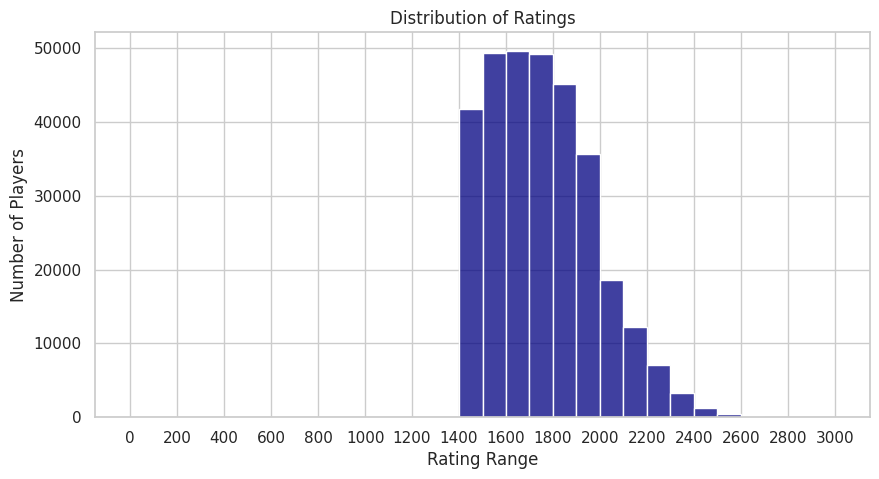

In [72]:
# -- Filter out Rating == 0 and Age_Bin == '0-5' --
df_clean = df_clean[df_clean['Rating'] != 0]
df_clean = df_clean[df_clean['Age_Range'] != '0-5']

# -- Set up plot style --
sns.set(style="whitegrid")
plt.rcParams.update({'axes.facecolor': 'white'})

# -- General histogram by Rating Bins --
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Rating'], bins=range(0, 3100, 100), color='navy', edgecolor='white')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Range')
plt.ylabel('Number of Players')
plt.xticks(range(0, 3100, 200))
plt.show()

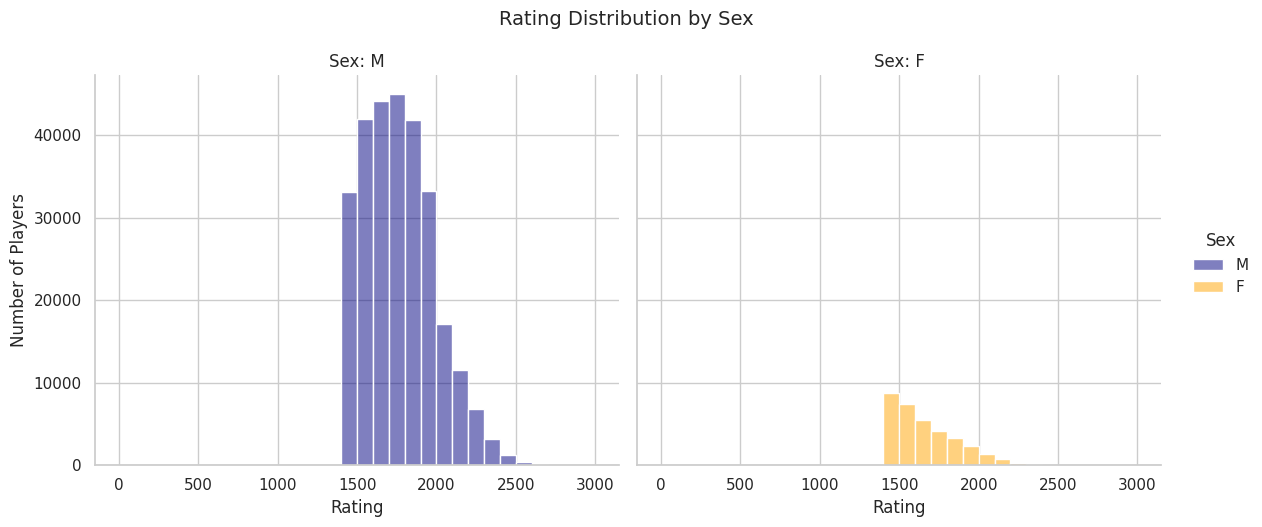

In [73]:
# -- Subplots by Sex --
g = sns.displot(
    data=df_clean,
    x='Rating',
    hue='Sex',
    col='Sex',
    bins=range(0, 3100, 100),
    height=5,
    aspect=1.2,
    palette={'M': 'navy', 'F': 'orange'}
)

g.set_axis_labels("Rating", "Number of Players")
g.set_titles("Sex: {col_name}")
plt.suptitle("Rating Distribution by Sex", y=1.05, fontsize=14)
plt.show()

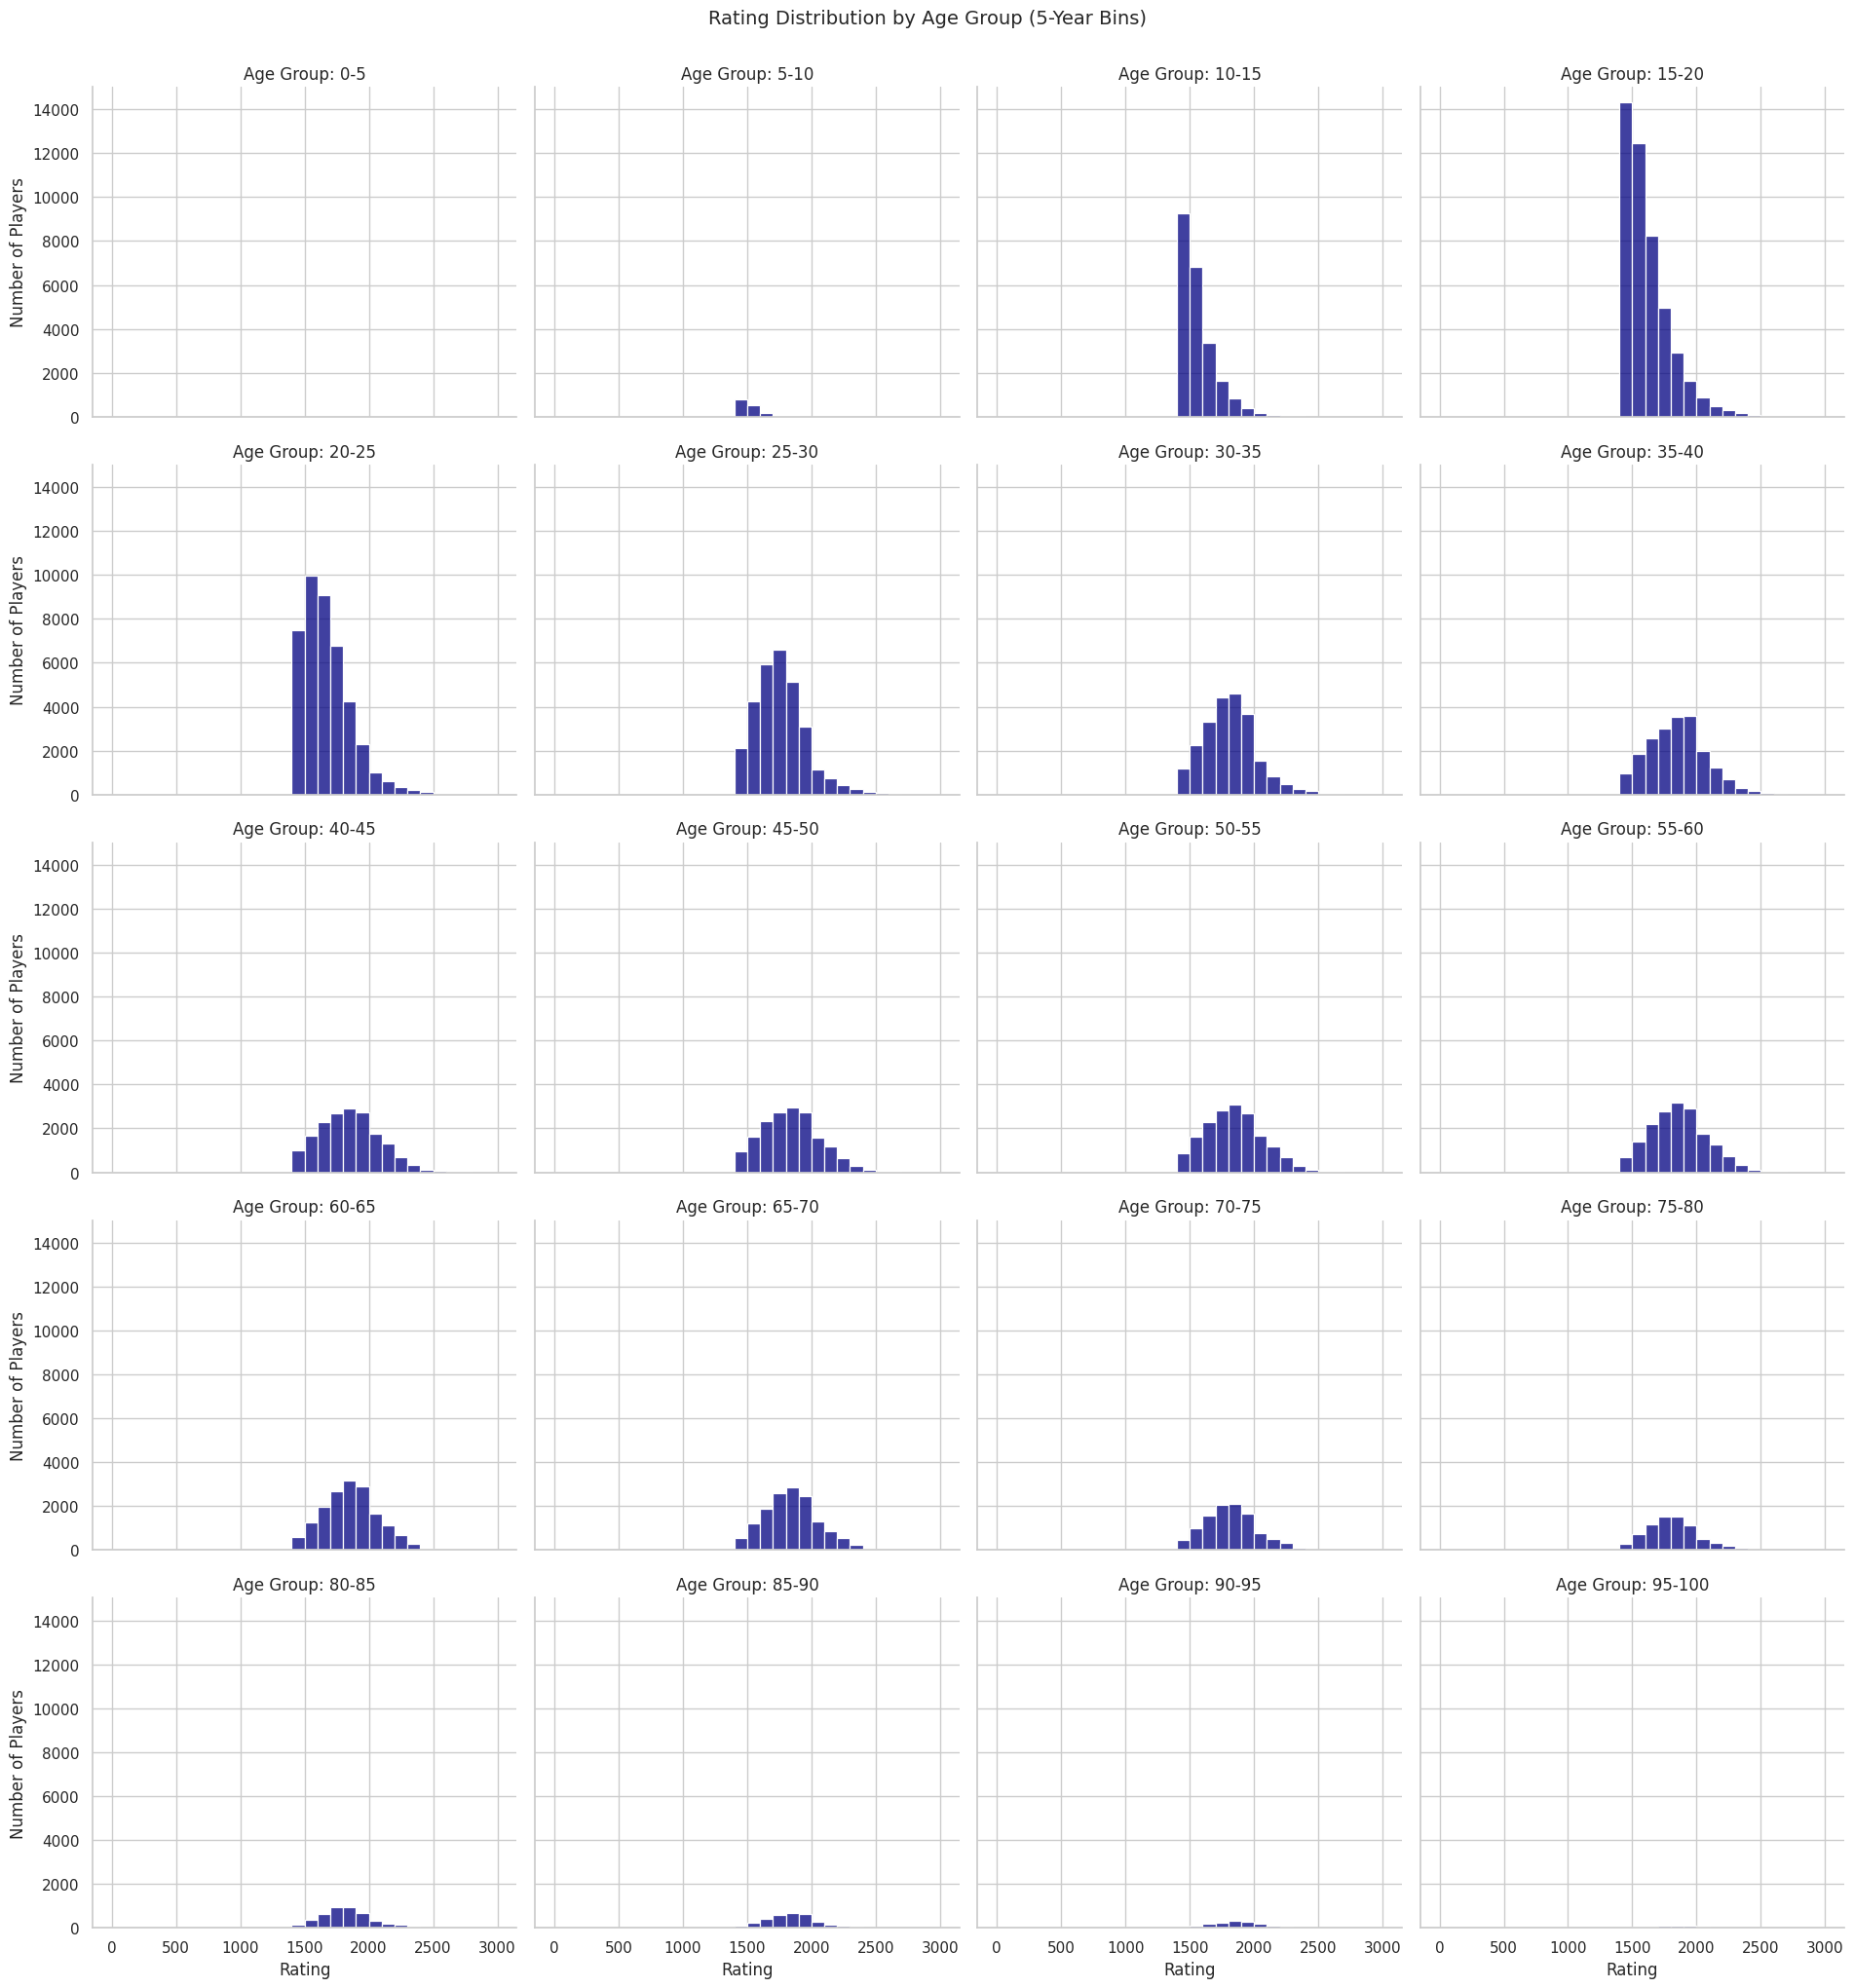

In [74]:
# -- Subplots by Age Bin --
g = sns.displot(
    data=df_clean,
    x='Rating',
    col='Age_Range',
    col_wrap=4,
    bins=range(0, 3100, 100),
    height=4,
    aspect=1.2,
    color='navy'
)

g.set_axis_labels("Rating", "Number of Players")
g.set_titles("Age Group: {col_name}")
plt.suptitle("Rating Distribution by Age Group (5-Year Bins)", y=1.02, fontsize=14)
plt.show()

In [75]:
# Group by Sex and compute mean and median
summary = df_clean.groupby('Sex')['Rating'].agg(['mean', 'median'])

# Compute mode separately (as it's not directly supported in .agg)
mode_male = df_clean[df_clean['Sex'] == 'M']['Rating'].mode().iloc[0]
mode_female = df_clean[df_clean['Sex'] == 'F']['Rating'].mode().iloc[0]

# Add mode to the summary table
summary['mode'] = [mode_male, mode_female]

# Round the values for readability
summary = summary.round(2)

print("📊 Rating Statistics by Sex:")
print(summary)

📊 Rating Statistics by Sex:
        mean  median    mode
Sex                         
F    1662.47  1613.0  1741.0
M    1765.03  1745.0  1458.0
